# House Price - Pipeline, GridSearch, CrossValidation

**Column Descriptions:**

0. LotFrontage: Linear feet of street connected to property
1. LotArea: Lot size in square feet
2. TotalBsmtSF: Total square feet of basement area
3. BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
4. Fireplaces: Number of fireplaces
5. PoolArea: Pool area in square feet
6. GarageCars: Size of garage in car capacity 
7. WoodDeckSF: Wood deck area in square feet
8. ScreenPorch: Screen porch area in square feet
9. MSZoning: Identifies the general zoning classification of the sale.
    * A		Agriculture
    * C		Commercial
    * FV	Floating Village Residential
    * I		Industrial
    * RH	Residential High Density
    * RL	Residential Low Density
    * RP	Residential Low Density Park 
    * RM	Residential Medium Density
10. Condition1: Proximity to various conditions
    * Artery	Adjacent to arterial street
    * Feedr	Adjacent to feeder street	
    * Norm	Normal	
    * RRNn	Within 200' of North-South Railroad
    * RRAn	Adjacent to North-South Railroad
    * PosN	Near positive off-site feature--park, greenbelt, etc.
    * PosA	Adjacent to postive off-site feature
    * RRNe	Within 200' of East-West Railroad
    * RRAe	Adjacent to East-West Railroad
11. Heating: Type of heating
    * Floor	Floor Furnace
    * GasA	Gas forced warm air furnace
    * GasW	Gas hot water or steam heat
    * Grav	Gravity furnace	
    * OthW	Hot water or steam heat other than gas
    * Wall	Wall furnace
12. Street: Type of road access to property
    * Grvl	Gravel	
    * Pave	Paved
13. CentralAir: Central air conditioning
    * N	No
    * Y	Yes
14. Foundation: Type of foundation
    * BrkTil	Brick & Tile
    * CBlock	Cinder Block
    * PConc	Poured Contrete	
    * Slab	Slab
    * Stone	Stone
    * Wood	Wood
15. ExterQual: Evaluates the quality of the material on the exterior 
    * Ex	Excellent
    * Gd	Good
    * TA	Average/Typical
    * Fa	Fair
    * Po	Poor
16. ExterCond: Evaluates the present condition of the material on the exterior
    * Ex	Excellent
    * Gd	Good
    * TA	Average/Typical
    * Fa	Fair
    * Po	Poor
17. BsmtQual: Evaluates the height of the basement
    * Ex	Excellent (100+ inches)	
    * Gd	Good (90-99 inches)
    * TA	Typical (80-89 inches)
    * Fa	Fair (70-79 inches)
    * Po	Poor (<70 inches
    * NA	No Basement
18. BsmtCond: Evaluates the general condition of the basement
    * Ex	Excellent
    * Gd	Good
    * TA	Typical - slight dampness allowed
    * Fa	Fair - dampness or some cracking or settling
    * Po	Poor - Severe cracking, settling, or wetness
    * NA	No Basement
19. BsmtExposure: Refers to walkout or garden level walls
    * Gd	Good Exposure
    * Av	Average Exposure (split levels or foyers typically score average or above)	
    * Mn	Mimimum Exposure
    * No	No Exposure
    * NA	No Basement
20. BsmtFinType1: Rating of basement finished area
    * GLQ	Good Living Quarters
    * ALQ	Average Living Quarters
    * BLQ	Below Average Living Quarters
    * Rec	Average Rec Room
    * LwQ	Low Quality
    * Unf	Unfinshed
    * NA	No Basement
21. KitchenQual: Kitchen quality
    * Ex	Excellent
    * Gd	Good
    * TA	Typical/Average
    * Fa	Fair
    * Po	Poor
22. FireplaceQu: Fireplace quality
    * Ex	Excellent - Exceptional Masonry Fireplace
    * Gd	Good - Masonry Fireplace in main level
    * TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
    * Fa	Fair - Prefabricated Fireplace in basement
    * Po	Poor - Ben Franklin Stove
    * NA	No Fireplace

## 1. Import and split

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn import set_config


For other Classification models see here:

### 1.1. Training data

In [4]:
#Read Data
url = "https://drive.google.com/file/d/19URNvJqMVhZH9A_l9q8XU31klPD1px3K/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

#Split
y = data.pop("Expensive")
X = data

In [ ]:
#check missing values
#X.isna().sum()

In [5]:
#check data types (which columns are not numeric and what to do with them)
X.drop("Id", axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   MSZoning       1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Heating        1460 non-null   object 
 12  Street         1460 non-null   object 
 13  CentralAir     1460 non-null   object 
 14  Foundation     1460 non-null   object 
 15  ExterQual      1460 non-null   object 
 16  ExterCond      1460 non-null   object 
 17  BsmtQual       1423 non-null   object 
 18  BsmtCond

**Conclusion:** 

**We have some missing values:**

 1   LotFrontage    1201 non-null   float64
  28  MasVnrArea     1452 non-null   float64
 42  GarageYrBlt    1379 non-null   float64
 
- 17  BsmtQual       1423 non-null   object 
- 18  BsmtCond       1423 non-null   object 
- 19  BsmtExposure   1422 non-null   object 
- 20  BsmtFinType1   1423 non-null   object 
- 22  FireplaceQu    770 non-null    object 
 51  Alley          91 non-null     object 
 65  MasVnrType     1452 non-null   object 
- 66  BsmtFinType2   1422 non-null   object 
 68  Electrical     1459 non-null   object 
 70  GarageType     1379 non-null   object 
- 71  GarageFinish   1379 non-null   object 
- 72  GarageQual     1379 non-null   object 
- 73  GarageCond     1379 non-null   object 
- 75  PoolQC         7 non-null      object 
- 76  Fence          281 non-null    object 
 77  MiscFeature    54 non-null     object 
---
ExterQual_cats = ["Po", "Fa", "TA", "Gd", "Ex"]
ExterCond_cats = ["Po", "Fa", "TA", "Gd", "Ex"]
- BsmtQual_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
- BsmtCond_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
- BsmtExposure_cats = ["NA", "No", "Mn", "Av", "Gd"]
- BsmtFinType1_cats = ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
KitchenQual_cats = ["Po", "Fa", "TA", "Gd", "Ex"]
- FireplaceQu_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
LotShape_cats = ['Reg', 'IR1', 'IR2', 'IR3']
- BsmtFinType2_cats = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
HeatingQC_cats = ["Po", "Fa", "TA", "Gd", "Ex"]
- GarageFinish_cats = ['NA','Unf','RFn','Fin']
- GarageQual_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
- GarageCond_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
- PoolQC_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
- Fence_cats = ['NA','MnWw','GdWo','MnPrv','GdPrv']


**categorical columns and the ordinal ones:** 

 9   MSZoning       1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Heating        1460 non-null   object 
 12  Street         1460 non-null   object 
 13  CentralAir     1460 non-null   object 
 14  Foundation     1460 non-null   object 
 15  ExterQual      1460 non-null   object ordinal
 16  ExterCond      1460 non-null   object ordinal
 17  BsmtQual       1423 non-null   object ordinal
 18  BsmtCond       1423 non-null   object ordinal
 19  BsmtExposure   1422 non-null   object ordinal
 20  BsmtFinType1   1423 non-null   object ordinal
 21  KitchenQual    1460 non-null   object ordinal
 22  FireplaceQu    770 non-null    object ordinal
 51  Alley          91 non-null     object 
 52  LotShape       1460 non-null   object ordinal
 53  LandContour    1460 non-null   object 
 54  Utilities      1460 non-null   object 
 55  LotConfig      1460 non-null   object 
 56  LandSlope      1460 non-null   object 
 57  Neighborhood   1460 non-null   object 
 58  Condition2     1460 non-null   object 
 59  BldgType       1460 non-null   object 
 60  HouseStyle     1460 non-null   object 
 61  RoofStyle      1460 non-null   object 
 62  RoofMatl       1460 non-null   object 
 63  Exterior1st    1460 non-null   object 
 64  Exterior2nd    1460 non-null   object 
 65  MasVnrType     1452 non-null   object 
 66  BsmtFinType2   1422 non-null   object ordinal
 67  HeatingQC      1460 non-null   object ordinal
 68  Electrical     1459 non-null   object 
 69  Functional     1460 non-null   object 
 70  GarageType     1379 non-null   object 
 71  GarageFinish   1379 non-null   object ordinal
 72  GarageQual     1379 non-null   object ordinal
 73  GarageCond     1379 non-null   object ordinal
 74  PavedDrive     1460 non-null   object 
 75  PoolQC         7 non-null      object ordinal
 76  Fence          281 non-null    object ordinal
 77  MiscFeature    54 non-null     object 
 78  SaleType       1460 non-null   object 
 79  SaleCondition  1460 non-null   object 

In [6]:
# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

### 1.2. Competition Data

In [7]:
url = "https://drive.google.com/file/d/15PfmTxmavQCT-f7iY9tgwWxm9t4GRees/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
competition_data = pd.read_csv(path)

#competition_data_original = pd.read_csv("test-housing-classification_Liane.csv")
#competition_data = pd.read_csv("test-housing-classification_Liane.csv")

In [8]:
competition_id = competition_data.pop("Id")
X_test_comp = competition_data

In [9]:
X_test_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1459 non-null   int64  
 1   LotFrontage    1232 non-null   float64
 2   TotalBsmtSF    1458 non-null   float64
 3   BedroomAbvGr   1459 non-null   int64  
 4   Fireplaces     1459 non-null   int64  
 5   PoolArea       1459 non-null   int64  
 6   GarageCars     1458 non-null   float64
 7   WoodDeckSF     1459 non-null   int64  
 8   ScreenPorch    1459 non-null   int64  
 9   MSZoning       1455 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Heating        1459 non-null   object 
 12  Street         1459 non-null   object 
 13  CentralAir     1459 non-null   object 
 14  Foundation     1459 non-null   object 
 15  ExterQual      1459 non-null   object 
 16  ExterCond      1459 non-null   object 
 17  BsmtQual       1415 non-null   object 
 18  BsmtCond

## 2. Building `preprocessor` pipeline

In [10]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
772,7819,94.0,1029,3,1,0,2,144,0,RL,...,Detchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Abnorml
157,12003,92.0,774,4,1,0,3,0,0,RL,...,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial
360,7540,NaN,888,2,1,0,2,0,192,RL,...,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
744,5395,41.0,1337,2,1,0,2,96,0,RL,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
150,10356,120.0,969,3,0,0,2,0,0,RL,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


In [11]:
# 2.a) select categorical and numerical column names
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

# 2.b) Numerical Pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="constant")   #strategy="constant"
)

# 2.c) Categorical Pipeline
# # # Defining the categorical encoder

ordinal_col_names = ['ExterQual', 
                                          'ExterCond', 
                                          'BsmtQual', 
                                          'BsmtCond',
                                          'BsmtExposure', 
                                          'BsmtFinType1', 
                                          'KitchenQual', 
                                          'FireplaceQu', 
                                          'LotShape', 
                                          'BsmtFinType2',
                                          'HeatingQC',
                                          'GarageFinish', 
                                          'GarageQual', 
                                          'GarageCond', 
                                          'PoolQC', 
                                          'Fence']

ordinal_cols = X_cat.columns.get_indexer(ordinal_col_names)
onehot_cols = X_cat.columns.get_indexer(list(set(X_cat) - set(ordinal_col_names)))


In [12]:
ordinal_cols

array([ 6,  7,  8,  9, 10, 11, 12, 13, 15, 29, 30, 34, 35, 36, 38, 39])

In [13]:
onehot_cols

array([ 3, 23, 37,  0, 26,  4, 22, 33,  5, 18,  1, 42, 25, 14, 19, 31, 17,
       16, 40, 24,  2, 28, 21, 41, 32, 27, 20])

In [14]:
X_num.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold',
       'YrSold'],
      dtype='object')

In [15]:
#ordinal_cols = X_cat.columns.get_indexer(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'])

#onehot_cols = X_cat.columns.get_indexer(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir','Foundation'])

ExterQual_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
ExterCond_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
BsmtQual_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
BsmtCond_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
BsmtExposure_cats = ["NA", "No", "Mn", "Av", "Gd"]
BsmtFinType1_cats = ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
KitchenQual_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
FireplaceQu_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
LotShape_cats = ["NA", 'Reg', 'IR1', 'IR2', 'IR3']
BsmtFinType2_cats = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
HeatingQC_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
GarageFinish_cats = ['NA','Unf','RFn','Fin']
GarageQual_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
GarageCond_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
PoolQC_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
Fence_cats = ['NA','MnWw','GdWo','MnPrv','GdPrv']

ordinal_cats_list = [ExterQual_cats, ExterCond_cats, BsmtQual_cats, BsmtCond_cats, 
                    BsmtExposure_cats, BsmtFinType1_cats, KitchenQual_cats, FireplaceQu_cats, 
                    LotShape_cats, BsmtFinType2_cats, HeatingQC_cats, GarageFinish_cats, GarageQual_cats,
                    GarageCond_cats, PoolQC_cats, Fence_cats]

# # # defining the ColumnTransformer with 2 branches: ordinal & onehot (categorical encoder)
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", OrdinalEncoder(categories=ordinal_cats_list), ordinal_cols),
        ("cat_onehot", OneHotEncoder(handle_unknown="ignore"), onehot_cols),
    ]
)

# # # categorical pipeline = "NA" imputer + categorical encoder
categoric_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="NA"),
                                 categorical_encoder
                                )

# 2.d) Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

**EXPLANATION FOR CATEGORICAL PIPELINE:**

**Start from the bottom! (6.4):**
* `categorical_pipe` = make_pipeline(SimpleImputer(), `categorical_encoder`)



**needs `categorical_encoder` (6.3):**
* `categorical_encoder` = ColumnTransformer(tranformers=[
    * ("cat_ordinal", OrdinalEncoder(categories=`ordinal_cats_list`), `ordinal_cols`), 
    * ("cat_onehot", OneHotEncoder(handle_unknown="ignore"), `onehot_cols`)])


**needs `ordinal_cats_list` (6.2) and needs `ordinal_cols`and `onehot_cols`(6.1):**

6.1. `ordinal_cols`and `onehot_cols`:
* ordinal_cols = X_cat.columns.get_indexer(["all_columns_that_have_ordinal_encoding", ...])
* onehot_cols = X_cat.columns.get_indexer(["all_other_columns_that_are_not_ordinal_but_categorical", ...])

6.2. `ordinal_cats_list`: define values and then make a list:**
* `rank_cat_15` = ['Ex','Gd','TA','Fa','Po', 'NA']
* `rank_cat_19` = ['Gd','Av','Mn','No','NA'] 
* etc.
* `ordinal_cats_list` = [`rank_cat_15`, `rank_cat_19`, ...]

## 3. Create `full_pipe` with Decision Tree

In [16]:
#create the full_pipeline
full_pipe = make_pipeline(preprocessor, 
                          StandardScaler(with_mean=False),   #
                          DecisionTreeClassifier(random_state=123))

# create parameter grid
param_grid = {
#    "columntransformer__num_pipe__simpleimputer__strategy":["constant", "median"],
#    "standardscaler__with_mean":[True, False],
#    "standardscaler__with_std":[True, False],
    "decisiontreeclassifier__max_depth": range(2, 14),
    "decisiontreeclassifier__min_samples_leaf": range(2, 12),
#    "decisiontreeclassifier__min_samples_split": range(3, 40, 2),
    "decisiontreeclassifier__criterion":["gini", "entropy"]
}

# define cross validation
search = RandomizedSearchCV(full_pipe,
                      param_grid,
                      cv=10,
                      verbose=1,
                      scoring="accuracy",
                      n_jobs=-2, 
                      n_iter=100)

# fit
search.fit(X_train, y_train)

# create a dictionary to keep track of the scores of different models 
scores = {"dtree" : search.best_score_}
best_params = {"dtree" : search.best_params_}


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [17]:
# create more dictionaries:
### training accuracy ON the ENTIRE TRAIN-DATA
y_train_pred = search.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
scores_train_data = {"dtree" : acc_train}

In [18]:
### testing accuracy
y_test_pred = search.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
scores_test_data = {"dtree" : acc_test}

In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 1253 to 1409
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        292 non-null    int64  
 1   LotFrontage    235 non-null    float64
 2   TotalBsmtSF    292 non-null    int64  
 3   BedroomAbvGr   292 non-null    int64  
 4   Fireplaces     292 non-null    int64  
 5   PoolArea       292 non-null    int64  
 6   GarageCars     292 non-null    int64  
 7   WoodDeckSF     292 non-null    int64  
 8   ScreenPorch    292 non-null    int64  
 9   MSZoning       292 non-null    object 
 10  Condition1     292 non-null    object 
 11  Heating        292 non-null    object 
 12  Street         292 non-null    object 
 13  CentralAir     292 non-null    object 
 14  Foundation     292 non-null    object 
 15  ExterQual      292 non-null    object 
 16  ExterCond      292 non-null    object 
 17  BsmtQual       282 non-null    object 
 18  BsmtCo

In [20]:
#look at full_pipe and check if its good
from sklearn import set_config

set_config(display="diagram")
full_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant'))]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVn...
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=123))])

In [21]:
scores

{'dtree': 0.9314913056292367}

In [22]:
search.best_params_

{'decisiontreeclassifier__min_samples_leaf': 10,
 'decisiontreeclassifier__max_depth': 11,
 'decisiontreeclassifier__criterion': 'entropy'}

In [23]:
dtree = DecisionTreeClassifier(random_state=123, min_samples_leaf=8, max_depth=10, criterion="entropy")

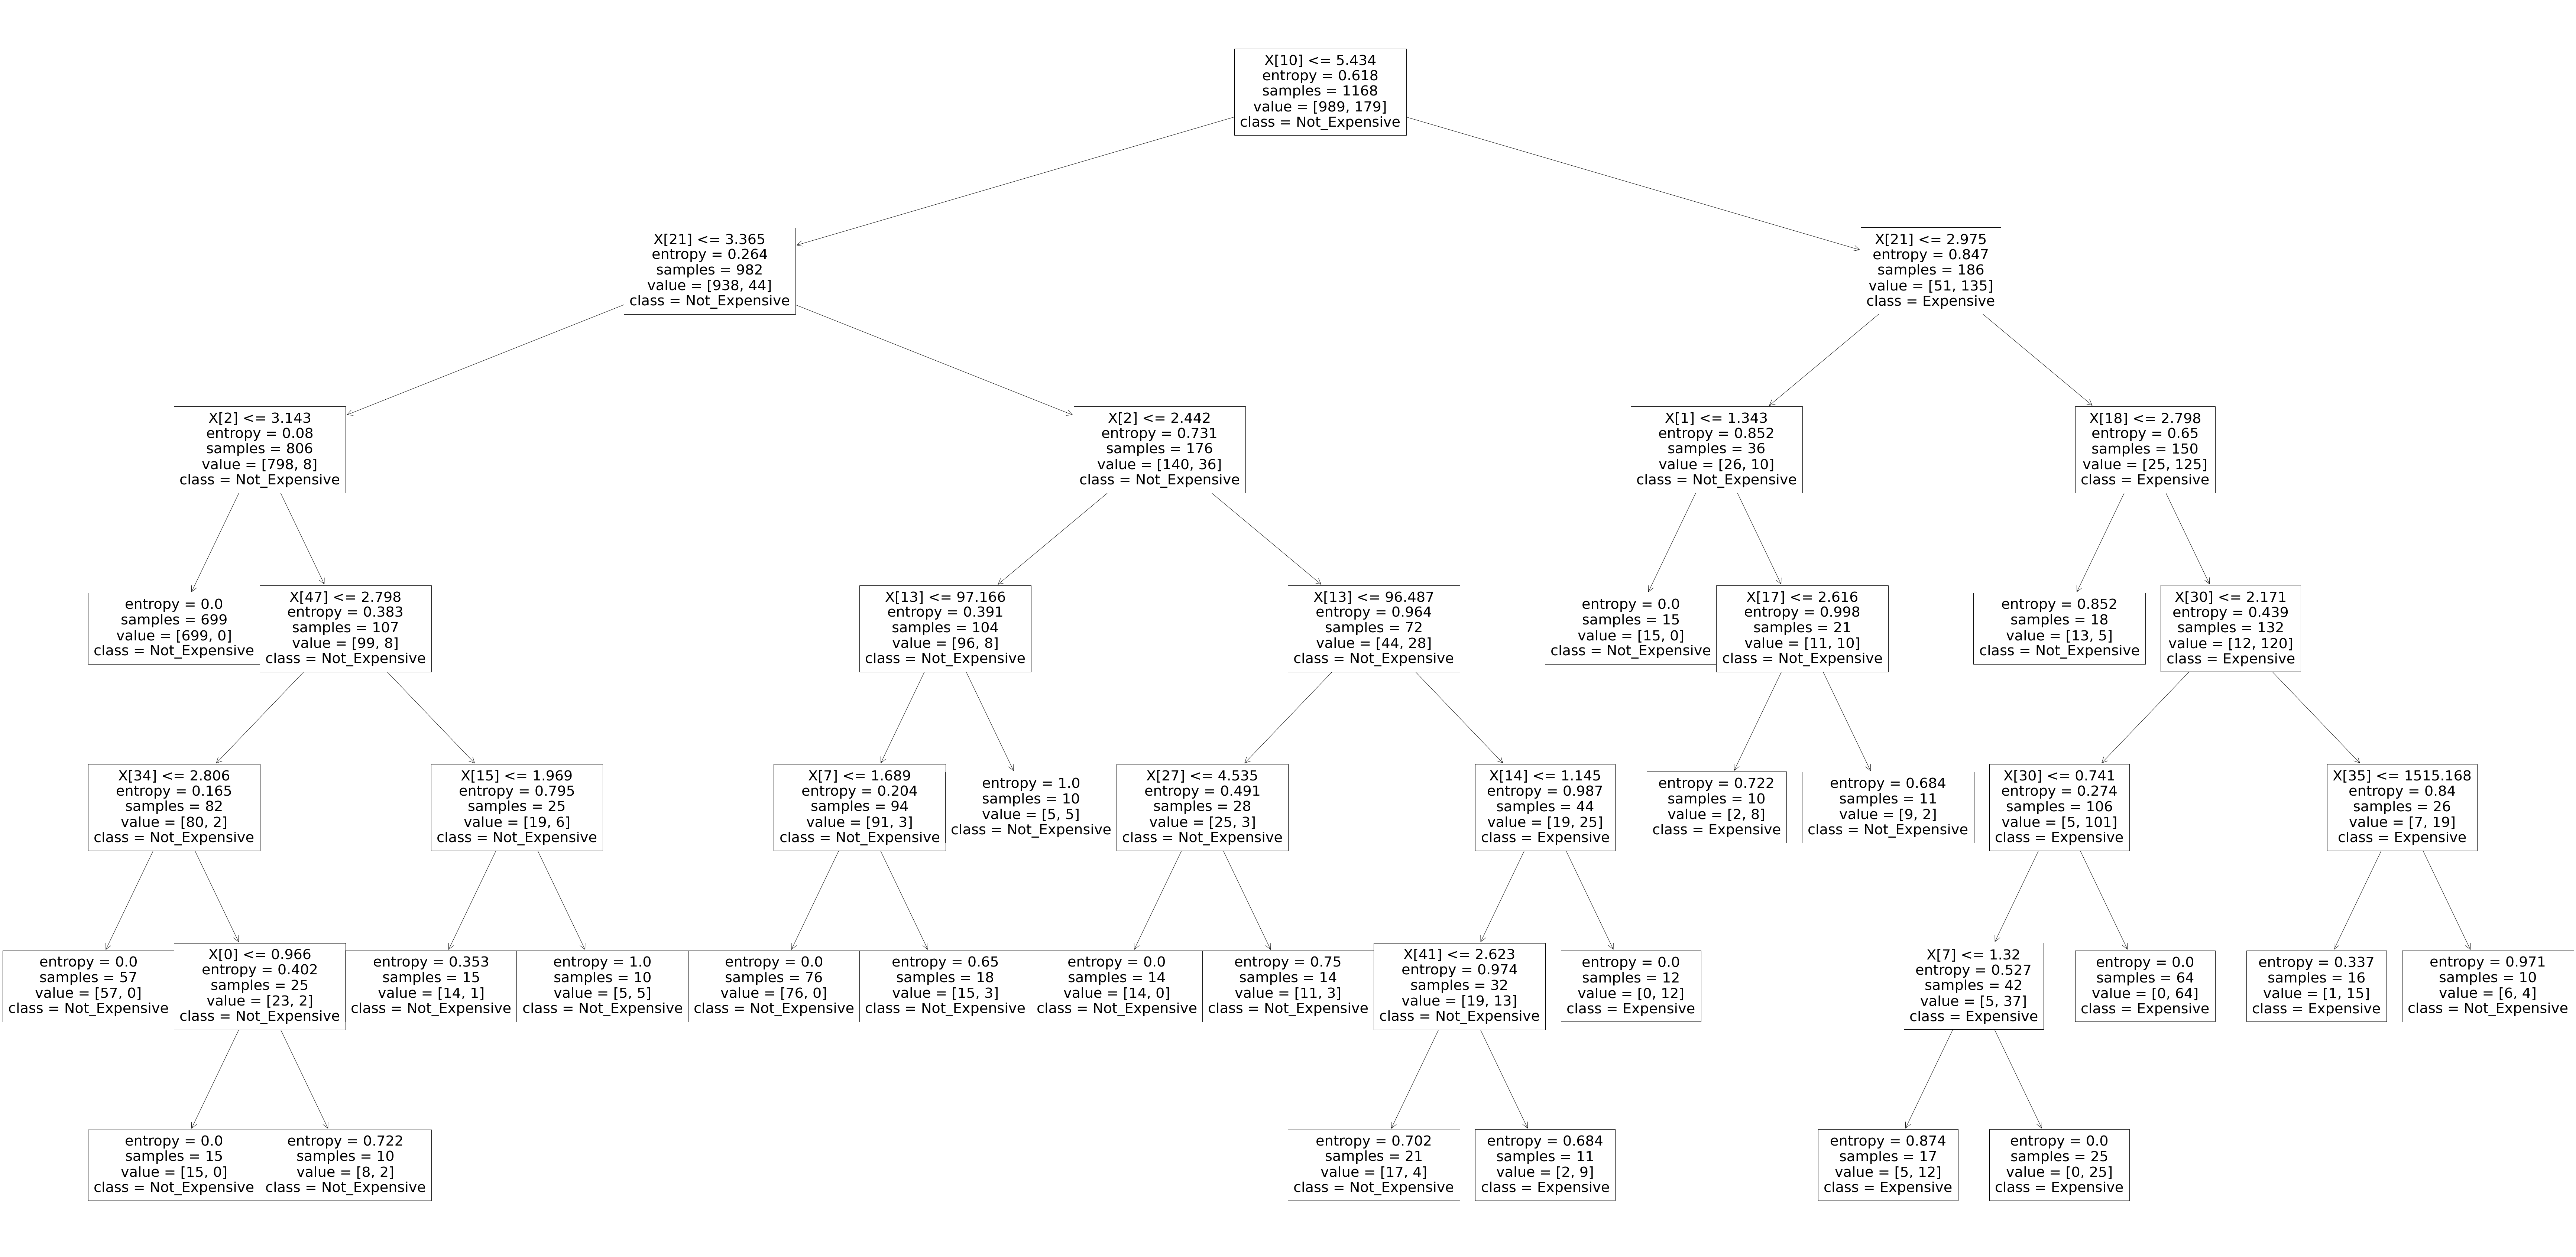

In [24]:
dtree = DecisionTreeClassifier(random_state=123, min_samples_leaf=10, max_depth=6, criterion="entropy")
#dtree.fit(X_train, y_train)

best_tree_pipe = make_pipeline(preprocessor,
                               StandardScaler(with_mean=False),
                               dtree)

best_tree_pipe.fit(X_train, y_train)

#now plot the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(124, 62))

plot_tree(
     best_tree_pipe['decisiontreeclassifier'],
#     filled=True, 
#     rounded=True, 
     class_names=['Not_Expensive','Expensive'], 
#     feature_names=X.columns
     );

#fig = plt.figure(figsize=(25,20))
#plot_tree(best_tree_pipe['decisiontreeclassifier'])
#plot_tree(dtree)

In [ ]:
best_tree_pipe.

### 3.2. Decision Tree for competition

In [ ]:
y_test_comp = search.predict(X_test_comp) #The error message does not deal with the real column 6 but one of the encoded ones

In [ ]:
# 1. Create the dictionary
pred = {
    "Id":competition_id, 
    "Expensive":y_test_comp
}

# 2. Build the dataframe
prediction_tree = pd.DataFrame(pred)

In [ ]:
prediction_tree

,Id,Expensive
0,1461,0
1,1462,0
2,1463,0
3,1464,0
4,1465,0
...,...,...
1454,2915,0
1455,2916,0
1456,2917,0
1457,2918,0


In [ ]:
prediction_tree.to_csv("prediction_tree_Liane.csv", index = False)

## 4. Create `knn_full_pipe` for KNN

In [ ]:
#create the full_pipeline
knn_full_pipe = make_pipeline(preprocessor, 
                          StandardScaler(with_mean=False),
                          KNeighborsClassifier()
                             )

# create parameter grid
param_grid = {
#    "columntransformer__num_pipe__simpleimputer__strategy":["constant", "median"],
#    "standardscaler__with_mean":[True, False],
#    "standardscaler__with_std":[True, False],
    "kneighborsclassifier__n_neighbors": range(2, 50),
    "kneighborsclassifier__weights": ["uniform", "distance"]
}

# define cross validation
knn_search = GridSearchCV(knn_full_pipe,
                      param_grid,
                      cv=10,
                      verbose=1,
                      scoring="accuracy",
                      n_jobs=-2, 
#                      n_iter=20
                    )

# fit
knn_search.fit(X_train, y_train)

# create a dictionary to keep track of the scores of different models 
scores["knn"] = knn_search.best_score_
best_params["knn"] = knn_search.best_params_


# create more dictionaries:
### training accuracy ON the ENTIRE TRAIN-DATA
y_train_pred = knn_search.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
scores_train_data["knn"] = acc_train

### testing accuracy
y_test_pred = knn_search.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
scores_test_data["knn"] = acc_test

Fitting 10 folds for each of 96 candidates, totalling 960 fits


In [ ]:
pd.DataFrame(scores, index=["best_score_"])

,dtree,knn
best_score_,0.931521,0.92637


### 4.2. knn for competition

In [ ]:
y_test_comp_knn = knn_search.predict(X_test_comp) 

In [ ]:
# 1. Create the dictionary
pred_knn = {
    "Id":competition_id, 
    "Expensive":y_test_comp_knn
}

# 2. Build the dataframe
prediction_knn = pd.DataFrame(pred_knn)

In [ ]:
prediction_knn.to_csv("prediction_knn_Liane.csv", index = False)

## 5. Create `rforest_full_pipe` for RandomForest

In [25]:
#create the full_pipeline
rforest_full_pipe = make_pipeline(preprocessor, 
                          StandardScaler(with_mean=False),
                          RandomForestClassifier()
                             )

# create parameter grid
param_grid = {
#    "columntransformer__num_pipe__simpleimputer__strategy":["constant", "median"],
#    "standardscaler__with_mean":[True, False],
#    "standardscaler__with_std":[True, False],
#    "randomforestclassifier__warm_start": [True, False],
    "randomforestclassifier__n_estimators": [100, 200],
    "randomforestclassifier__max_depth": range(2, 14),
    "randomforestclassifier__min_samples_leaf": range(2, 10),
    "randomforestclassifier__criterion":["gini", "entropy"]
}

# define cross validation
rforest_search = RandomizedSearchCV(rforest_full_pipe,
                      param_grid,
                      cv=10,
                      verbose=1,
                      scoring="accuracy",
                      n_jobs=-2, 
                      n_iter=100
                    )

# fit
rforest_search.fit(X_train, y_train)

# create a dictionary to keep track of the scores of different models 
scores["rforest"] = rforest_search.best_score_
best_params["rforest"] = rforest_search.best_params_


# create more dictionaries:
### training accuracy ON the ENTIRE TRAIN-DATA
y_train_pred = rforest_search.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
scores_train_data["rforest"] = acc_train

### testing accuracy
y_test_pred = rforest_search.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
scores_test_data["rforest"] = acc_test

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [30]:
y_test_pred_comp_1 = rforest_search.predict(X_test_comp)

In [32]:
df_comp_r = pd.DataFrame(competition_id)
df_comp_r["Expensive"] = y_test_pred_comp_1
df_comp_r

,Id,Expensive
0,1461,0
1,1462,0
2,1463,0
3,1464,0
4,1465,0
...,...,...
1454,2915,0
1455,2916,0
1456,2917,0
1457,2918,0


In [33]:
df_comp_r.to_csv("df_comp_sai_r.csv", index=False)

In [34]:
from google.colab import files
files.download("df_comp_sai_r.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
from google.colab import files
files.download("df_comp_sai_r.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
pd.DataFrame(scores, index=["best_score_"])


,dtree,rforest
best_score_,0.931491,0.951194


In [27]:
best_params

{'dtree': {'decisiontreeclassifier__min_samples_leaf': 10,
  'decisiontreeclassifier__max_depth': 11,
  'decisiontreeclassifier__criterion': 'entropy'},
 'rforest': {'randomforestclassifier__n_estimators': 200,
  'randomforestclassifier__min_samples_leaf': 5,
  'randomforestclassifier__max_depth': 9,
  'randomforestclassifier__criterion': 'gini'}}

In [28]:
best_params

{'dtree': {'decisiontreeclassifier__min_samples_leaf': 10,
  'decisiontreeclassifier__max_depth': 11,
  'decisiontreeclassifier__criterion': 'entropy'},
 'rforest': {'randomforestclassifier__n_estimators': 200,
  'randomforestclassifier__min_samples_leaf': 5,
  'randomforestclassifier__max_depth': 9,
  'randomforestclassifier__criterion': 'gini'}}

In [29]:
best_params

{'dtree': {'decisiontreeclassifier__min_samples_leaf': 10,
  'decisiontreeclassifier__max_depth': 11,
  'decisiontreeclassifier__criterion': 'entropy'},
 'rforest': {'randomforestclassifier__n_estimators': 200,
  'randomforestclassifier__min_samples_leaf': 5,
  'randomforestclassifier__max_depth': 9,
  'randomforestclassifier__criterion': 'gini'}}

In [ ]:
pd.DataFrame(scores_test_data, index=["acc_test"])

,dtree,knn,rforest
acc_test,0.931507,0.934932,0.945205


In [ ]:
rforest_search["randomforestclassifier"].feature_importances_

TypeError: 'RandomizedSearchCV' object is not subscriptable

In [ ]:
rforest_search.cv_results_

{'mean_fit_time': array([0.45923448, 0.79663427, 0.37117767, 0.44409695, 0.69841583,
        0.43404915, 0.84199781, 0.466767  , 0.76605883, 0.42782891,
        0.43303401, 0.78523562, 0.77498839, 0.38040674, 0.4621181 ,
        0.52850842, 0.87258108, 0.480247  , 0.44756699, 0.50337677,
        0.84108438, 0.47979467, 0.48919449, 0.8679672 , 1.00080805,
        0.9292716 , 0.8057713 , 0.47322867, 0.44619143, 0.79798274,
        0.80023603, 0.71356399, 0.46189549, 0.4843632 , 0.42914996,
        0.72743778, 0.40848892, 0.42513168, 0.79461772, 0.46908393,
        0.86666899, 0.88090112, 0.71538548, 0.40576777, 0.43690019,
        0.447259  , 0.46981764, 0.84063396, 0.83769586, 0.79819684]),
 'std_fit_time': array([0.01362515, 0.01525008, 0.00519023, 0.00692912, 0.02057812,
        0.02346633, 0.01714347, 0.04724627, 0.02854999, 0.00848623,
        0.01684123, 0.01169861, 0.02435039, 0.00749796, 0.02888294,
        0.03420449, 0.10190932, 0.04155206, 0.02846791, 0.0141483 ,
        0.031

In [ ]:
# Access pipeline steps:

# get the features names array that passed on feature selection object
x_features = preprocessor.fit(X_train).get_feature_names_out()

# get the boolean array that will show the chosen features by (true or false)
mask_used_ft = rf_pipe.named_steps['feature_selection_percentile'].get_support()

# combine those arrays to identify the dropped features and create the array with features names that were choosed
x_features_used = np.delete((x_features * mask_used_ft), np.where(x_features * mask_used_ft == ""))

# take the array with feature importance values
importances = rf_pipe.named_steps['classifier'].feature_importances_ 

# sort the numbers
indices = np.argsort(importances) 

#plot results
plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [x_features_used[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 5.2.RandomForest for competition

In [ ]:
y_test_comp_rforest = rforest_search.predict(X_test_comp)

In [ ]:
# 1. Create the dictionary
pred_rforest = {
    "Id":competition_id, 
    "Expensive":y_test_comp_rforest
}

# 2. Build the dataframe
prediction_rforest = pd.DataFrame(pred_rforest)

In [ ]:
prediction_rforest.to_csv("prediction_rforest_Liane_3.csv", index = False)

## Some exploration of the results

In [ ]:
# 1. Create the dictionary for joint results
#pred_all = {
#    "Id":competition_id, 
#    "Expensive_tree":y_test_comp,
#    "Expensive_knn":y_test_comp_knn,
#    "Expensive_forest":y_test_comp_rforest
#}

# 2. Build the dataframe
#prediction_all_results = pd.DataFrame(pred_all)

In [ ]:
prediction_all_results["Expensive_forest_3"] = y_test_comp_rforest

In [ ]:
prediction_all_results.loc[#((prediction_all_results.Expensive_forest != prediction_all_results.Expensive_forest_2) |
                           (prediction_all_results.Expensive_forest != prediction_all_results.Expensive_forest_3) #|
                           #(prediction_all_results.Expensive_forest_3 != prediction_all_results.Expensive_forest_2)) 
                           , :]

In [ ]:
id_s_diff_2_3

,Id,Expensive_tree,Expensive_knn,Expensive_forest,Expensive_forest_2,Expensive_forest_3
235,1696,1,0,1,1,0
242,1703,1,0,1,1,0
401,1862,0,1,1,0,0
402,1863,0,0,1,0,0
403,1864,0,0,1,0,0
495,1956,1,0,1,0,0
542,2003,1,1,0,1,1
546,2007,1,0,0,1,1
580,2041,1,0,0,0,1
873,2334,1,1,1,1,0


In [ ]:
id_s_diff_2_3.merge(competition_data_original, how='inner', left_on="Id", right_on="Id")

,Id,Expensive_tree,Expensive_knn,Expensive_forest,Expensive_forest_2,Expensive_forest_3,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1696,1,0,1,1,0,15896,NaN,1177.0,4,...,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,1703,1,0,1,1,0,10206,78.0,1614.0,3,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,1862,0,1,1,0,0,11855,NaN,1168.0,6,...,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,1863,0,0,1,0,0,7939,NaN,1168.0,6,...,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,1864,0,0,1,0,0,7976,NaN,1168.0,6,...,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,1956,1,0,1,0,0,12511,NaN,1420.0,4,...,Attchd,Fin,TA,Gd,Y,NaN,MnPrv,NaN,WD,Normal
6,2003,1,1,0,1,1,9801,73.0,1341.0,3,...,BuiltIn,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,2007,1,0,0,1,1,10625,85.0,1660.0,3,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
8,2041,1,0,0,0,1,16280,103.0,1426.0,3,...,Attchd,RFn,TA,TA,Y,NaN,GdWo,NaN,WD,Normal
9,2334,1,1,1,1,0,10790,83.0,1066.0,4,...,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
